In [ ]:
## Calculating and computing along slope transport for slope and shelf region

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=25) #20 
rc('ytick', labelsize=25) #20
rc('axes', titlesize=25)    # fontsize of the axes title
rc('axes', labelsize=25) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

In [6]:
from dask.distributed import Client

c=Client(local_directory = '/g/data/v45/qo9901/') 
c 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43891/status,
Dashboard: /proxy/43891/status,Workers: 7
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39591,Workers: 7
Dashboard: /proxy/43891/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:37535,Total threads: 4
Dashboard: /proxy/40983/status,Memory: 17.88 GiB
Nanny: tcp://127.0.0.1:33721,


In [7]:
hu = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='hu', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
hu

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [8]:
# location limits of dataset - choosing slice near totten
#lon_lim = slice(-270, -230) #slice(30, 45)#
lat_lim = slice(-79, -60) #slice(-70, -65)

hu_region = hu.sel( yu_ocean = lat_lim)

In [31]:

exp_ctrl= '01deg_jra55v13_ryf9091'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

#### SET EXPT HERE
expt = exp_ctrl


In [10]:
# We will use an annual average from 10 year in the RYF run
start_time_mw='2110-01-01 00:00:00' 
end_time_mw='2159-12-31 00:00:00'


In [11]:
from cosima_cookbook import explore

In [26]:
ee = explore.ExperimentExplorer(session=session, experiment=exp_wthmp)


In [27]:
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [34]:
u = cc.querying.getvar(expt=expt, variable='u', 
                          session=session, frequency = '1 monthly').sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
v = cc.querying.getvar(expt=expt, variable='v', 
                          session=session, frequency = '1 monthly').sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
dzt = cc.querying.getvar(expt=expt, variable='dzt', 
                          session=session, frequency = '1 monthly').sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xt_ocean':360})
dzt

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

<xarray.DataArray 'dzt' (time: 2760, st_ocean: 75, yt_ocean: 440, xt_ocean: 3600)> Size: 1TB
dask.array<rechunk-merge, shape=(2760, 75, 440, 3600), dtype=float32, chunksize=(1, 7, 69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.15 -60.1 -60.05
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 22kB 1950-01-16 12:00:00 ... 2179-12-16 12:00:00
Attributes: (12/13)
    long_name:      t-cell thickness
    units:          m
    valid_range:    [-1.e+01  1.e+05]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  cell_thickness
    ...             ...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [35]:
dyu = cc.querying.getvar(expt=expt, variable='dyu', 
                          session=session,attrs={'cell_methods': 'time: point'}, n= 1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
dxu = cc.querying.getvar(expt=expt, variable='dxu', 
                          session=session,attrs={'cell_methods': 'time: point'}, n= 1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})

In [36]:
# NEEDload coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

In [37]:
#sea_level_lim = sea_level.sel( xt_ocean= lon_lim, yt_ocean=lat_lim, time = flex_period)

# coordinates
lat_t = geolat_t.sel( xt_ocean= lon_lim,yt_ocean=lat_lim)
lon_t = geolon_t.sel(xt_ocean= lon_lim, yt_ocean=lat_lim)

dxt_lim = dxt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)
dyt_lim = dyt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)

dxu_lim = dxu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)
dyu_lim = dyu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)

In [38]:
# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

In [39]:
flex_period = slice(start_time_mw, end_time_mw)

In [40]:
## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

# merge coordinates and variables in one dataset
#vel = xr.merge([coordinates, sea_level_lim.sel(time=flex_period), ocean_grid.sel(time = flex_period)])# time is flex_period before
#vel = xr.merge([coordinates, sea_level_lim.sel(time=flex_period)])#, ocean_grid.sel(time = flex_period)])# time is flex_period before

In [41]:
vel = xr.merge([hu,coordinates, u.sel(time=flex_period), v.sel(time=flex_period), ocean_grid.sel(xt_ocean= lon_lim,xu_ocean= lon_lim, yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

In [42]:
vel

<xarray.Dataset> Size: 570GB
Dimensions:     (xu_ocean: 3600, yu_ocean: 440, xt_ocean: 3600, yt_ocean: 440,
                 st_ocean: 75, time: 600)
Coordinates:
  * xu_ocean    (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean    (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c    (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c    (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
  * xt_ocean    (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean    (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.1 -60.05
    geolon_t    (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
  * st_ocean    (st_ocean) float64 600B 0.5413 1.681 ... 5.511e+03 5.709e+03
  * time        (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
Data variables: (12/13)
    hu          (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dxu         (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dyu         (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    u           (time, st_ocean, yu_ocean, xu_ocean) float32 285GB dask.array<chunksize=(1, 7, 69, 360), meta=np.ndarray>
    ...          ...
    ht          (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    area_u      (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    kmt         (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    kmu         (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    drag_coeff  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [43]:
vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=True)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

In [44]:
grid = xgcm.Grid(vel, periodic=['X'], metrics = metrics,boundary='extend')
grid

<xgcm.Grid>
Y Axis (not periodic, boundary='extend'):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
X Axis (periodic, boundary='extend'):
  * center   xt_ocean --> right
  * right    xu_ocean --> center

In [45]:
tx_trans_int_z = cc.querying.getvar(expt=expt, variable='tx_trans_int_z', 
                          session=session).sel(time=flex_period).sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xu_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [46]:
ty_trans_int_z = cc.querying.getvar(expt=expt, variable='ty_trans_int_z', 
                          session=session).sel(yu_ocean = slice(-79,-60)).sel(time=flex_period).chunk({ 'yu_ocean':69, 'xt_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [47]:
# Take topographic gradient (simple gradient over one grid cell) and move back to u-grid
dhu_dx = grid.interp( grid.diff(vel.hu, 'X') / grid.interp(vel.dxu, 'X'), 'X')

# In meridional direction, we need to specify what happens at the boundary
dhu_dy = grid.interp( grid.diff(vel.hu, 'Y', boundary='extend') / grid.interp(vel.dyt, 'X'), 'Y', boundary='extend')

# Select latitude slice
dhu_dx = dhu_dx.sel(yu_ocean=lat_lim)
dhu_dy = dhu_dy.sel(yu_ocean=lat_lim)

# Magnitude of the topographic slope (to normalise the topographic gradient)
topographic_slope_magnitude = np.sqrt(dhu_dx**2 + dhu_dy**2)

In [48]:
## mask with clusters
cluster_mask_access = xr.open_mfdataset('/home/561/qo9901/Antarctic-Eddy-Res-Compare/largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access= cluster_mask_access.assign_coords(xu_ocean = ('xu_ocean', hu.xu_ocean.data), yu_ocean = ('yu_ocean', hu.yu_ocean.data))


In [49]:
mask_bath_slopeshelf = xr.where((hu_region <2600),True,False)
#1500 or 2500
mask_bath_slope= xr.where((hu_region <2500)& (hu_region >600),True,False)
mask_bath_shelf = xr.where((hu_region <600),True,False)

In [50]:
# Along-slope velocity
T_along =  grid.interp(tx_trans_int_z, axis = 'Y', boundary = 'extend') * dhu_dy / topographic_slope_magnitude \
    - grid.interp(ty_trans_int_z, axis = 'X') * dhu_dx / topographic_slope_magnitude
T_along
# Load the data
T_along = (T_along*cluster_mask_access).load()

# Similarly, we can calculate the cross-slope velocity:
#v_cross = u*dhu_dx/topographic_slope_magnitude + v*dhu_dy/topographic_slope_magnitude

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

In [51]:
expt

'01deg_jra55v13_ryf9091'

In [52]:
rho = 1035 #[kg/m3]
T_along = T_along/rho
T_along.attrs['units'] = 'm3/s'
T_along.attrs['long_name '] = 'Along-slope vertically summed transport'


In [53]:
T_along

<xarray.Dataset> Size: 4GB
Dimensions:                        (xu_ocean: 3600, yu_ocean: 440, time: 600)
Coordinates:
  * xu_ocean                       (xu_ocean) float64 29kB -279.9 ... 80.0
  * yu_ocean                       (yu_ocean) float64 4kB -78.98 ... -60.02
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time, yu_ocean, xu_ocean) float32 4GB nan...
Attributes:
    units:       m3/s
    long_name :  Along-slope vertically summed transport

In [54]:
T_along_slope_lon = T_along.where(mask_bath_slope == True).cumsum(dim = 'yu_ocean').min('yu_ocean')#.isel(yu_ocean = -1)
T_along_slope_time = T_along_slope_lon.mean(dim = 'xu_ocean')
T_along_slope_time

<xarray.Dataset> Size: 7kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float32 2kB dask.array<chunksize=(600,), meta=np.ndarray>

In [55]:
T_along_shelf_lon = T_along.where(mask_bath_shelf == True).cumsum(dim = 'yu_ocean').min('yu_ocean')#.isel(yu_ocean = -1)
T_along_shelf_time = T_along_shelf_lon.mean(dim = 'xu_ocean')
T_along_shelf_time

<xarray.Dataset> Size: 7kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float32 2kB dask.array<chunksize=(600,), meta=np.ndarray>

In [56]:
T_along_shelf_time.load()

<xarray.Dataset> Size: 7kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float32 2kB -8.112e+05 ... -7.039e+05

In [57]:
T_along_slope_time.load()

<xarray.Dataset> Size: 7kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float32 2kB -2.637e+06 ... -2.804e+06

In [58]:
expt

'01deg_jra55v13_ryf9091'

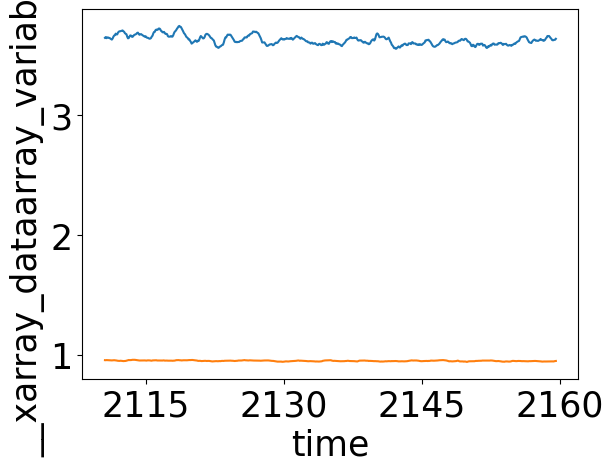

In [59]:
(-T_along_slope_time.__xarray_dataarray_variable__/1e6).rolling(time = 12, center = True).mean().plot()
(-T_along_shelf_time.__xarray_dataarray_variable__/1e6).rolling(time = 12, center = True).mean().plot()

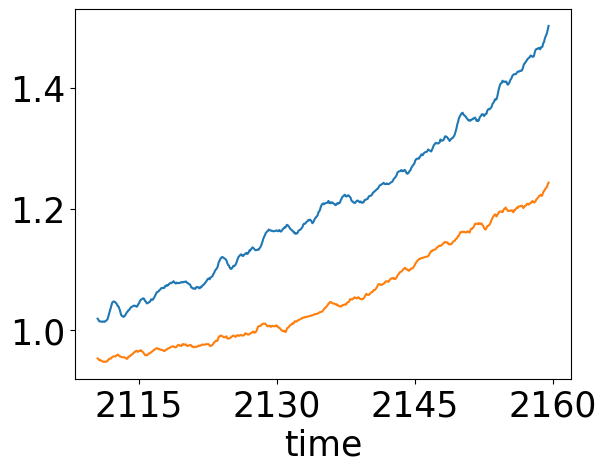

In [36]:
(-T_along_slope_time/1e6).rolling(time = 12, center = True).mean().plot()
(-T_along_shelf_time/1e6).rolling(time = 12, center = True).mean().plot()

In [60]:
T_along_shelf_time.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_mintime_' + expt + '_masked.nc')

In [61]:
T_along_slope_time.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_mintime_' + expt + '_masked.nc')

In [128]:
## Regional

In [62]:
lat_slice_ross = slice(-80, -65)
lon_slice_ross = slice(-200, -150)
lat_slice_WA = slice(-77, -65) # -80
lon_slice_WA = slice(-130, -70)
lat_slice_WEA = slice(-75, -65) #-80
lon_slice_WEA = slice(-25, 40)
lat_slice_east = slice(-67, -63)
lon_slice_east = slice(-270, -230)

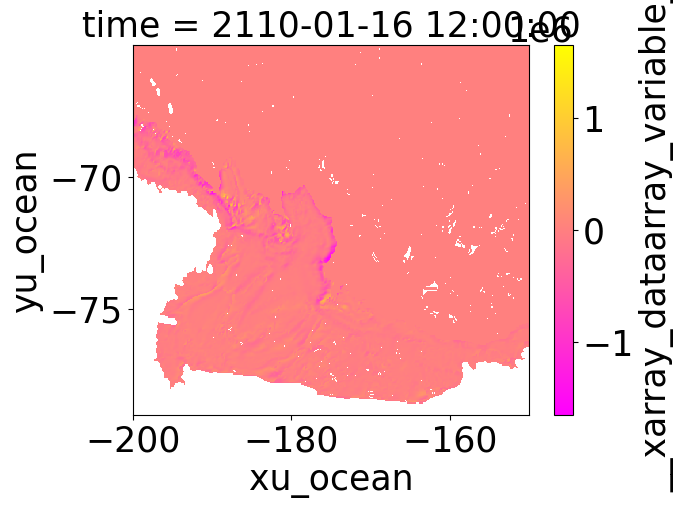

In [63]:
T_along_ross = T_along.sel(xu_ocean = lon_slice_ross, yu_ocean
                           = lat_slice_ross)
T_along_ross.__xarray_dataarray_variable__.isel(time = 0).plot(cmap = 'spring')

In [64]:
 T_along_ross.where(mask_bath_shelf == True).cumsum(dim = 'yu_ocean').isel(time = 0, xu_ocean = 100).isel(yu_ocean = -1)

<xarray.Dataset> Size: 20B
Dimensions:                        ()
Coordinates:
    xu_ocean                       float64 8B -190.0
    time                           object 8B 2110-01-16 12:00:00
Data variables:
    __xarray_dataarray_variable__  float32 4B dask.array<chunksize=(), meta=np.ndarray>

array(-4509604., dtype=float32)

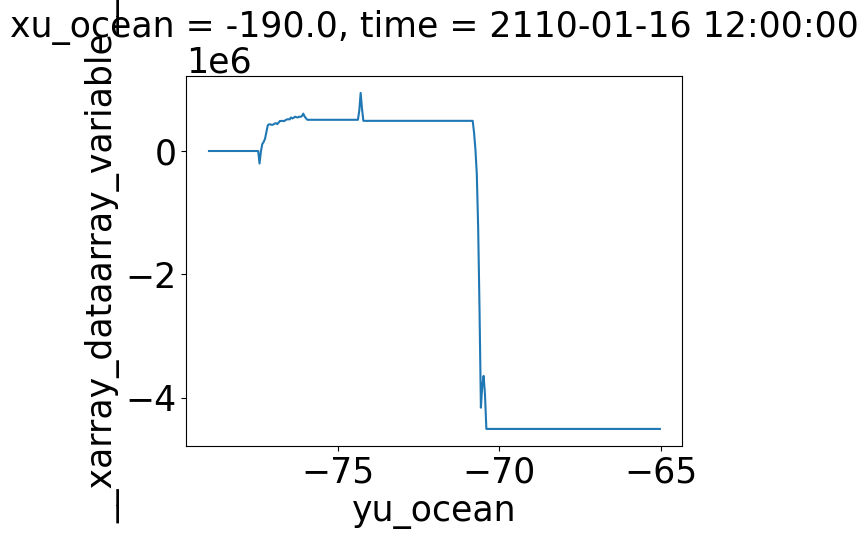

In [65]:
 T_along_ross.__xarray_dataarray_variable__.where(mask_bath_slope == True).cumsum(dim = 'yu_ocean').isel(time = 0, xu_ocean = 100).plot()
 T_along_ross.__xarray_dataarray_variable__.where(mask_bath_slope == True).cumsum(dim = 'yu_ocean').isel(time = 0, xu_ocean = 100).isel(yu_ocean = -1).values#.scatter(marker = 'x')

In [66]:
def T_along_slopeshelf_regional(T_along, lon_slice, lat_slice):
    T_along_area = T_along.sel(xu_ocean = lon_slice, yu_ocean = lat_slice)
    T_along_slope_lon = T_along_area.where(mask_bath_slope == True).cumsum(dim = 'yu_ocean').min('yu_ocean')#.isel(yu_ocean = -1)
    T_along_slope_time = T_along_slope_lon.mean(dim = 'xu_ocean')
    
    T_along_shelf_lon = T_along_area.where(mask_bath_shelf == True).cumsum(dim = 'yu_ocean').min('yu_ocean')#.isel(yu_ocean = -1)
    T_along_shelf_time = T_along_shelf_lon.mean(dim = 'xu_ocean')
    return T_along_slope_time.load(), T_along_shelf_time.load()

In [67]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:36625': 3956,
 'tcp://127.0.0.1:37535': 3087,
 'tcp://127.0.0.1:39715': 3568,
 'tcp://127.0.0.1:41153': 3189,
 'tcp://127.0.0.1:44491': 3174,
 'tcp://127.0.0.1:44885': 3515,
 'tcp://127.0.0.1:46271': 4161}

In [68]:
expt

'01deg_jra55v13_ryf9091'

In [69]:
T_along_slope_WA, T_along_shelf_WA = T_along_slopeshelf_regional(T_along, lon_slice_WA, lat_slice_WA)
T_along_slope_WA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WA_mintime_' + expt + '_masked.nc')
T_along_shelf_WA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WA_mintime_' + expt + '_masked.nc')

In [70]:
T_along_slope_WEA, T_along_shelf_WEA = T_along_slopeshelf_regional(T_along, lon_slice_WEA, lat_slice_WEA)
T_along_slope_WEA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WEA_mintime_' + expt + '_masked.nc')
T_along_shelf_WEA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WEA_mintime_' + expt + '_masked.nc')

In [71]:
T_along_slope_EA, T_along_shelf_EA = T_along_slopeshelf_regional(T_along, lon_slice_east, lat_slice_east)
T_along_slope_EA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_EA_mintime_' + expt + '_masked.nc')
T_along_shelf_EA.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_EA_mintime_' + expt + '_masked.nc')

In [72]:
T_along_slope_ross, T_along_shelf_ross = T_along_slopeshelf_regional(T_along, lon_slice_ross, lat_slice_ross)
T_along_slope_ross.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_ross_mintime_' + expt + '_masked.nc')
T_along_shelf_ross.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_ross_mintime_' + expt + '_masked.nc')

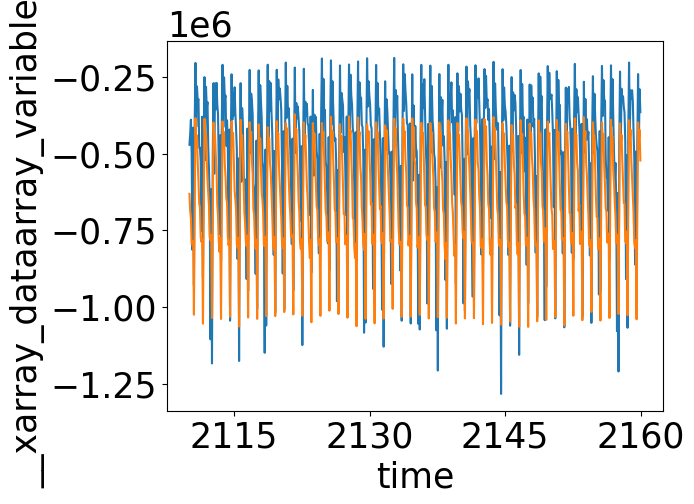

In [73]:
T_along_slope_WA.__xarray_dataarray_variable__.plot()
T_along_shelf_WA.__xarray_dataarray_variable__.plot()

# Load

In [76]:
T_slope_wthmp_region = [] #EA, Ross, WA, WEA in order
T_slope_wthp_region = [] #EA, Ross, WA, WEA in order
T_slope_ctrl_region = [] #EA, Ross, WA, WEA in order

T_shelf_wthmp_region = [] 
T_shelf_wthp_region = []
T_shelf_ctrl_region = [] 

T_along_slope_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_EA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_slope_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_EA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_slope_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_EA_mintime_' + exp_ctrl + '_masked.nc')/1e6
T_along_shelf_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_EA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_shelf_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_EA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_shelf_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_EA_mintime_' + exp_ctrl + '_masked.nc')/1e6

T_slope_wthmp_region.append(T_along_slope_wthmp)
T_slope_wthp_region.append(T_along_slope_wthp)
T_slope_ctrl_region.append(T_along_slope_ctrl)

T_shelf_wthmp_region.append(T_along_shelf_wthmp)
T_shelf_wthp_region.append(T_along_shelf_wthp)
T_shelf_ctrl_region.append(T_along_shelf_ctrl)

T_along_slope_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_ross_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_slope_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_ross_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_slope_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_ross_mintime_' + exp_ctrl + '_masked.nc')/1e6
T_along_shelf_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_ross_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_shelf_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_ross_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_shelf_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_ross_mintime_' + exp_ctrl + '_masked.nc')/1e6

T_slope_wthmp_region.append(T_along_slope_wthmp)
T_slope_wthp_region.append(T_along_slope_wthp)
T_slope_ctrl_region.append(T_along_slope_ctrl)

T_shelf_wthmp_region.append(T_along_shelf_wthmp)
T_shelf_wthp_region.append(T_along_shelf_wthp)
T_shelf_ctrl_region.append(T_along_shelf_ctrl)


T_along_slope_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_slope_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_slope_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WA_mintime_' + exp_ctrl + '_masked.nc')/1e6
T_along_shelf_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_shelf_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_shelf_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WA_mintime_' + exp_ctrl + '_masked.nc')/1e6

T_slope_wthmp_region.append(T_along_slope_wthmp)
T_slope_wthp_region.append(T_along_slope_wthp)
T_slope_ctrl_region.append(T_along_slope_ctrl)

T_shelf_wthmp_region.append(T_along_shelf_wthmp)
T_shelf_wthp_region.append(T_along_shelf_wthp)
T_shelf_ctrl_region.append(T_along_shelf_ctrl)


T_along_slope_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WEA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_slope_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WEA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_slope_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_WEA_mintime_' + exp_ctrl + '_masked.nc')/1e6
T_along_shelf_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WEA_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_shelf_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WEA_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_shelf_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_WEA_mintime_' + exp_ctrl + '_masked.nc')/1e6

T_slope_wthmp_region.append(T_along_slope_wthmp)
T_slope_wthp_region.append(T_along_slope_wthp)
T_slope_ctrl_region.append(T_along_slope_ctrl)

T_shelf_wthmp_region.append(T_along_shelf_wthmp)
T_shelf_wthp_region.append(T_along_shelf_wthp)
T_shelf_ctrl_region.append(T_along_shelf_ctrl)

In [79]:
T_along_slope_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_slope_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_slope_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_slope_mintime_' + exp_ctrl + '_masked.nc')/1e6
T_along_shelf_wthmp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_mintime_' + exp_wthmp + '_masked.nc')/1e6
T_along_shelf_wthp = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_mintime_' + exp_wthp + '_masked.nc')/1e6
T_along_shelf_ctrl = -xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/T_along_shelf_mintime_' + exp_ctrl + '_masked.nc')/1e6

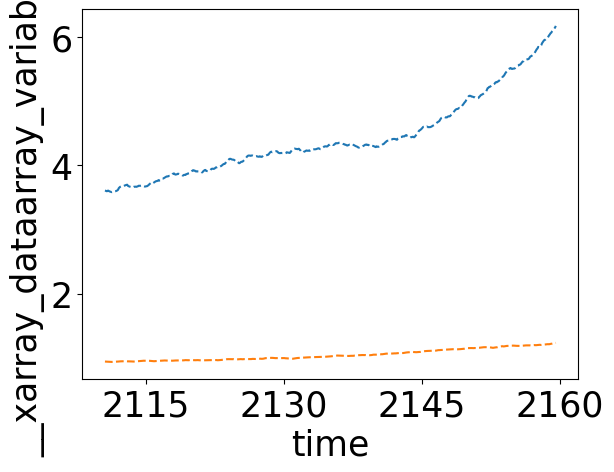

In [15]:
color_line = ['C0','C1', 'C2']

T_along_slope_wthmp.__xarray_dataarray_variable__.rolling(time = 12, center = True).mean().plot(c = color_line[0], linestyle = 'dashed')
T_along_shelf_wthmp.__xarray_dataarray_variable__.rolling(time = 12, center = True).mean().plot(c = color_line[1], linestyle = 'dashed')
#(-T_along_slope_time/1e6).rolling(time = 12, center = True).mean().plot(c = 'g')
#(-T_along_shelf_time/1e6).rolling(time = 12, center = True).mean().plot(c = 'g') # minimum of the cumulatively summed transport

In [23]:
## percentage increases over 50 years on slope and shelf
wthmp_slope_perc = 100*(T_along_slope_wthmp.isel(time = -1) - T_along_slope_wthmp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthmp_slope_perc = wthmp_slope_perc.__xarray_dataarray_variable__.values
wthmp_slope_perc

array(88.06425, dtype=float32)

In [24]:
## percentage increases over 50 years on slope and shelf
wthmp_shelf_perc = 100*(T_along_shelf_wthmp.isel(time = -1) - T_along_shelf_wthmp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthmp_shelf_perc = wthmp_shelf_perc.__xarray_dataarray_variable__.values
wthmp_shelf_perc

array(6.769189, dtype=float32)

In [26]:
## percentage increases over 50 years on slope and shelf
wthp_slope_perc = 100*(T_along_slope_wthp.isel(time = -1) - T_along_slope_wthp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthp_slope_perc = wthp_slope_perc.__xarray_dataarray_variable__.values
wthp_slope_perc

array(-4.4102745, dtype=float32)

In [25]:
## percentage increases over 50 years on slope and shelf
wthp_shelf_perc = 100*(T_along_shelf_wthp.isel(time = -1) - T_along_shelf_wthp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthp_shelf_perc = wthp_shelf_perc.__xarray_dataarray_variable__.values
wthp_shelf_perc

array(-3.353938, dtype=float32)

In [27]:
## percentage increases over 50 years on slope and shelf
wthmp_slope_perc_2half = 100*(T_along_slope_wthmp.isel(time = -1) - T_along_slope_wthmp.isel(time = 300))/ T_along_slope_wthmp.isel(time = 300)
wthmp_slope_perc_2half = wthmp_slope_perc_2half.__xarray_dataarray_variable__.values
wthmp_slope_perc_2half

array(63.662895, dtype=float32)

In [28]:
wthmp_slope_perc_1half = 100*(T_along_slope_wthmp.isel(time = 300) - T_along_slope_wthmp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthmp_slope_perc_1half = wthmp_slope_perc_1half.__xarray_dataarray_variable__.values
wthmp_slope_perc_1half

array(14.909521, dtype=float32)

In [30]:
## percentage increases over 50 years on slope and shelf
wthmp_shelf_perc_2half = 100*(T_along_shelf_wthmp.isel(time = -1) - T_along_shelf_wthmp.isel(time = 300))/ T_along_slope_wthmp.isel(time = 300)
wthmp_shelf_perc_2half = wthmp_shelf_perc_2half.__xarray_dataarray_variable__.values
wthmp_shelf_perc_2half

array(4.176782, dtype=float32)

In [29]:
wthmp_shelf_perc_1half = 100*(T_along_shelf_wthmp.isel(time = 300) - T_along_shelf_wthmp.isel(time = 0))/ T_along_slope_wthmp.isel(time = 0)
wthmp_shelf_perc_1half = wthmp_shelf_perc_1half.__xarray_dataarray_variable__.values
wthmp_shelf_perc_1half

array(1.9696685, dtype=float32)

In [16]:
import matplotlib.lines as mlines

In [87]:
## cumulative meltwater addition
MW_ant_final = 0.08 # [Sv], 0.160 sv/century added around west antarctica
m_MW_ant = 0.08/len(T_along_shelf_wthmp.time)
y_MW_ant = m_MW_ant*np.arange(1,len(T_along_shelf_wthmp.time)+1)
#y_MW_ant


0
1
2
3


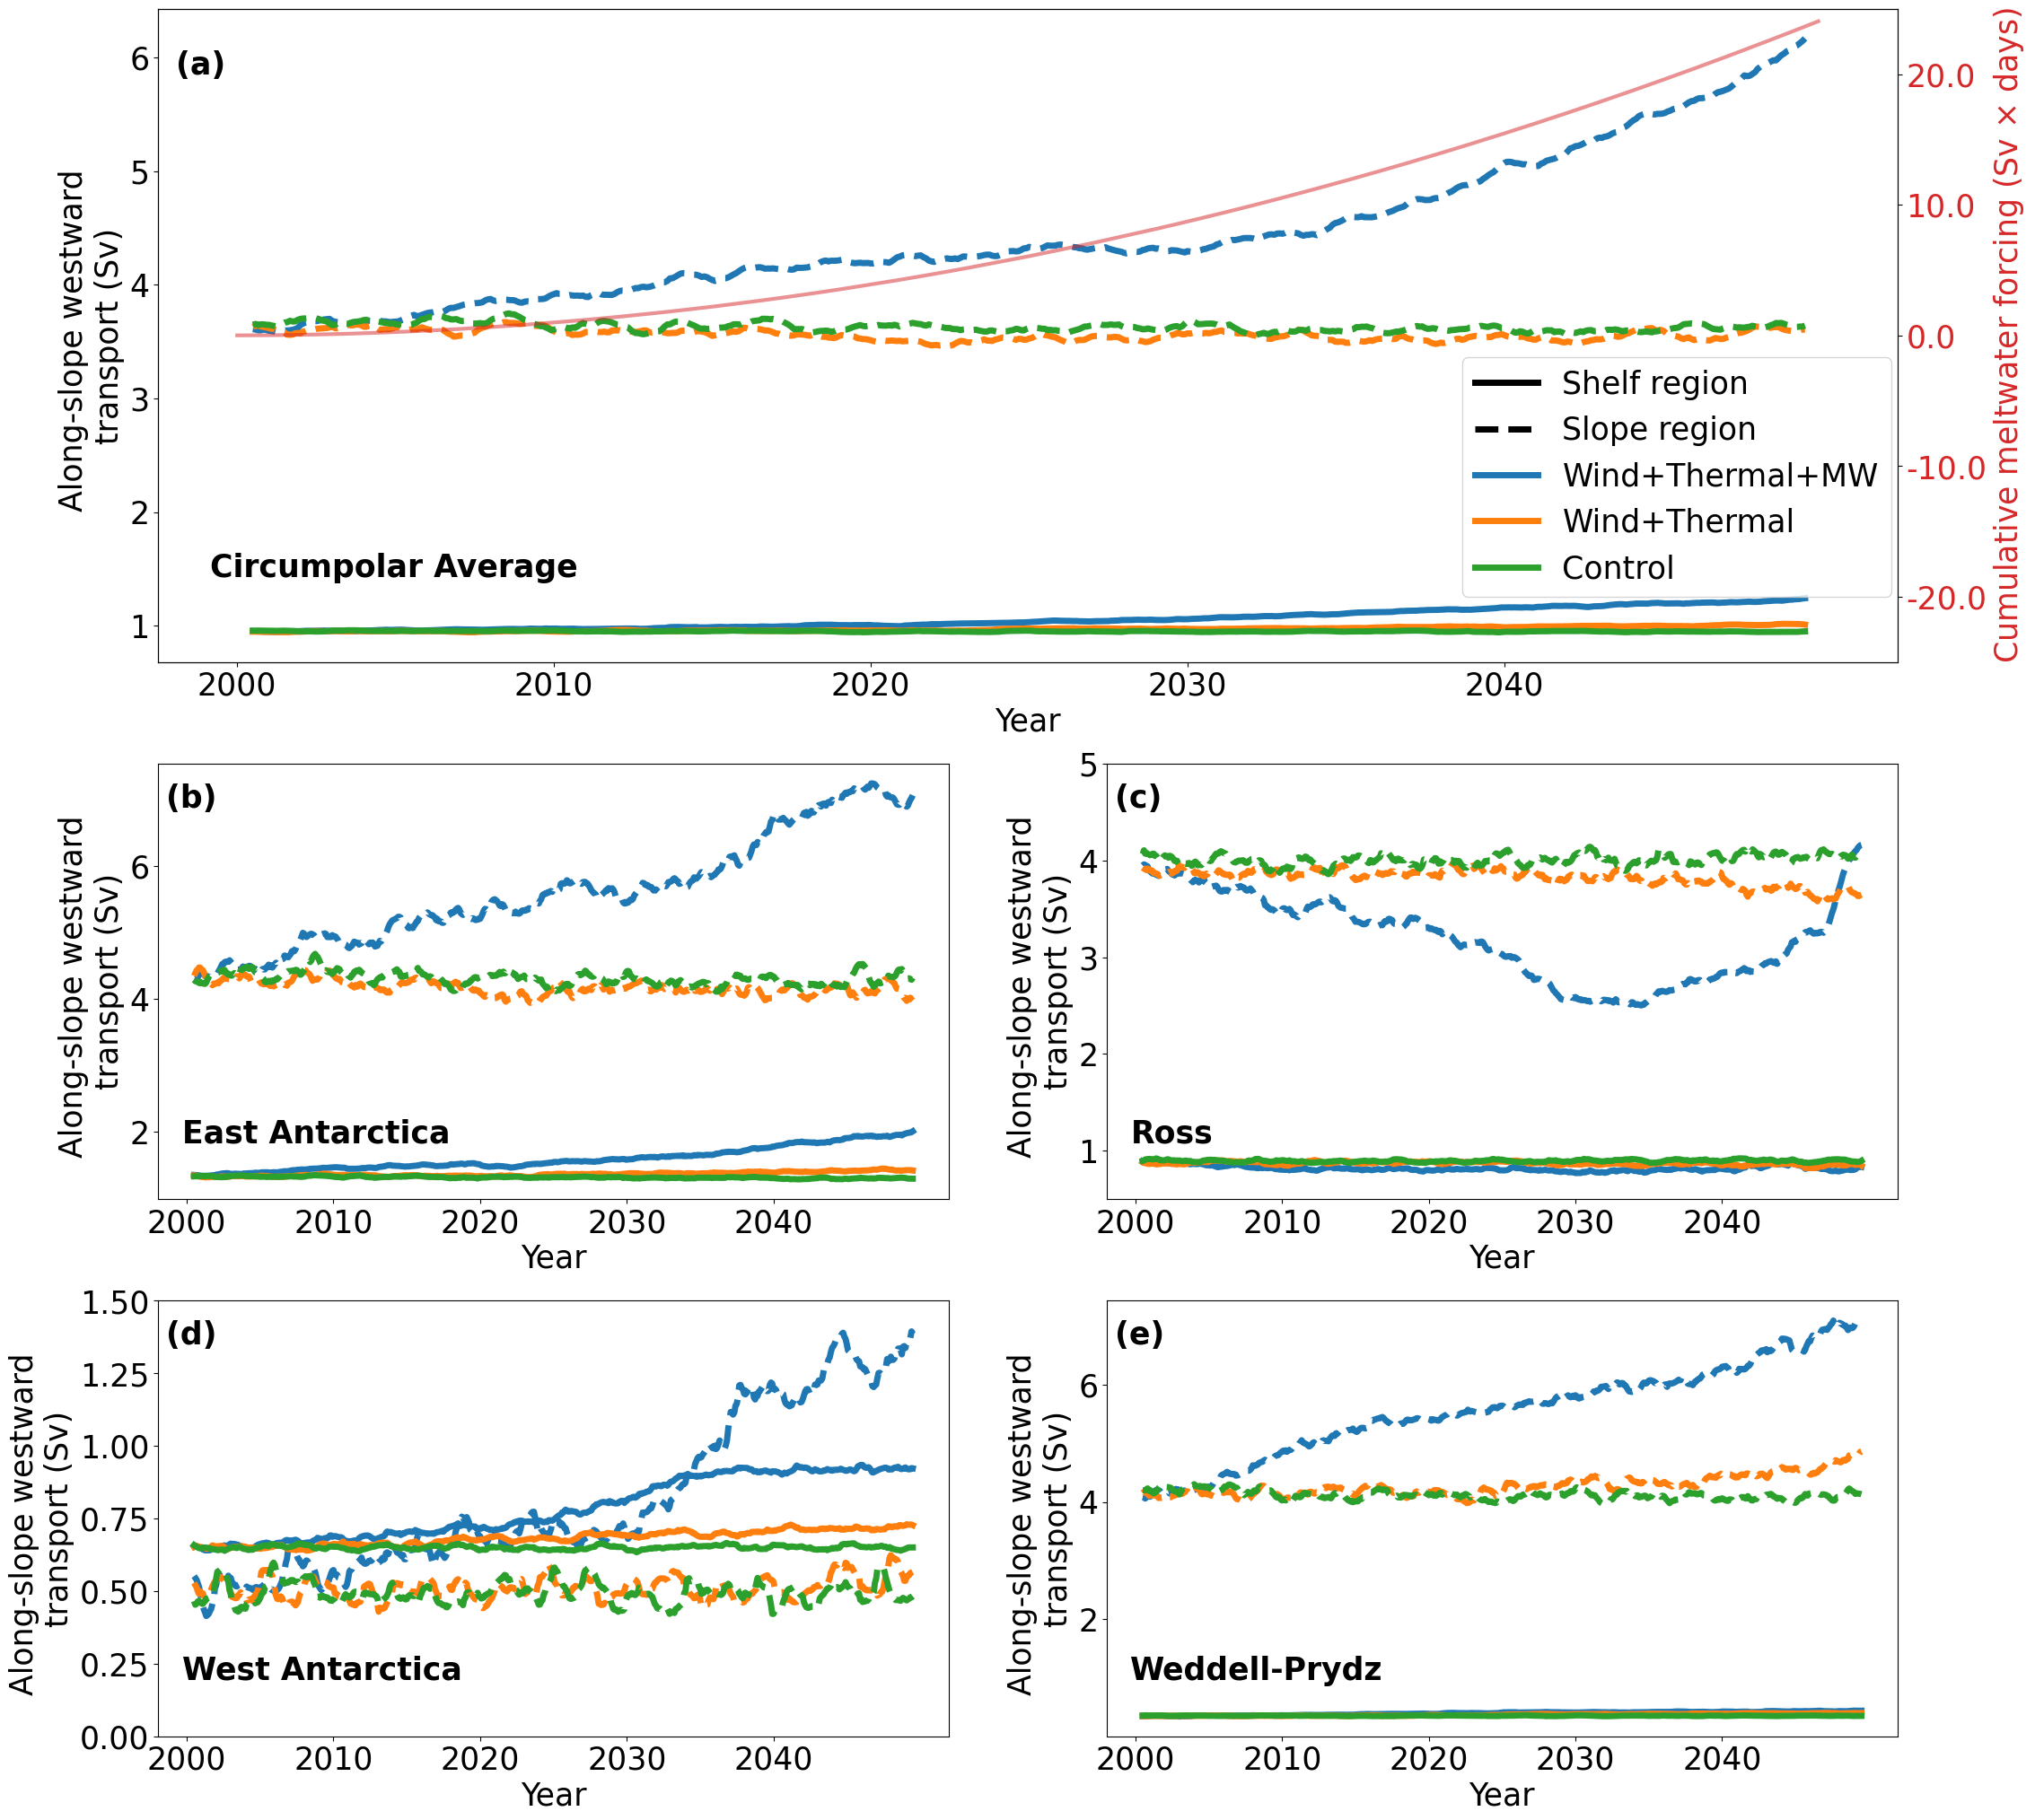

In [95]:
fig, ax = plt.subplot_mosaic('aa;bc;de', figsize = (25,25), height_ratios = (3,2,2))
lw = 5
color_line = ['C0','C1', 'C2']
T_along_slope_wthmp.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[0], linestyle = 'dashed',lw = lw,  ax=ax['a'])
T_along_slope_wthp.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[1], linestyle = 'dashed',lw = lw,  ax=ax['a'])
T_along_slope_ctrl.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[2], linestyle = 'dashed',lw = lw,   ax=ax['a'])
'''
T_along_slope_wthmp.__xarray_dataarray_variable__.rolling(time = 12, center = True).mean().plot(c = 'g', linestyle = 'dashed', ax=ax['a'])
T_along_slope_wthp.__xarray_dataarray_variable__.rolling(time = 12, center = True).mean().plot(c = 'r', linestyle = 'dashed', ax=ax['a'])
(-T_along_slope_time/1e6).rolling(time = 12, center = True).mean().plot(c = 'g', ax=ax['a'])
(-T_along_shelf_time/1e6).rolling(time = 12, center = True).mean().plot(c = 'r', ax=ax['a'])
'''
T_along_shelf_wthmp.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[0], lw = lw, ax=ax['a'])
T_along_shelf_wthp.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[1],lw = lw,  ax=ax['a'])
T_along_shelf_ctrl.__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[2],lw = lw,   ax=ax['a'])

ax2 = ax['a'].twinx()
ax2.plot(T_along_shelf_wthmp.time, np.cumsum(y_MW_ant), label = 'Cumulative MW forcing (Sv)', color = 'C3', lw = 3, alpha = 0.5)
ax2.set_ylim([-25,25])
ax2.set_yticklabels(labels = ax2.get_yticks(), color = 'C3')
ax2.set_ylabel(r'Cumulative meltwater forcing (Sv $\times$ days)', color = 'C3')
    
i = 0
for letter in list(map(chr, range(ord('b'), ord('e')+1))):
    print(i)
    T_slope_wthmp_region[i].__xarray_dataarray_variable__.rolling(time = 12, center = True).mean().plot(c = color_line[0], linestyle = 'dashed', lw = lw, ax=ax[letter])
    T_slope_wthp_region[i].__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[1], linestyle = 'dashed',lw = lw,  ax=ax[letter])
    T_slope_ctrl_region[i].__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[2], linestyle = 'dashed',lw = lw,  ax=ax[letter])
    
    T_shelf_wthmp_region[i].__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[0], lw = lw,  ax=ax[letter])
    T_shelf_wthp_region[i].__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[1],lw = lw,  ax=ax[letter])
    T_shelf_ctrl_region[i].__xarray_dataarray_variable__.rolling(time = 12, center= True).mean().plot(c = color_line[2],lw = lw,  ax=ax[letter])

    i = i+1

for letter in list(map(chr, range(ord('a'), ord('e')+1))):
    ax[letter].set_ylabel('Along-slope westward \ntransport (Sv)')
    ax[letter].set_xlabel('Year')
    ax[letter].set_xticks(T_along_shelf_wthmp.time[::120].values, labels = range(2000,2050,10))
    ax[letter].text(0.01,0.90,'(' + letter+ ')', transform=ax[letter].transAxes, fontweight = 'bold')
    ax[letter].set_title('')
ax['c'].set_ylim([0.5,5])   
ax['d'].set_ylim([0.,1.5])   

ax['a'].text(0.03,0.13,'Circumpolar Average', transform=ax['a'].transAxes, fontweight = 'bold')
ax['b'].text(0.03,0.13,'East Antarctica', transform=ax['b'].transAxes, fontweight = 'bold')
ax['c'].text(0.03,0.13,'Ross', transform=ax['c'].transAxes, fontweight = 'bold')
ax['d'].text(0.03,0.13,'West Antarctica', transform=ax['d'].transAxes, fontweight = 'bold')
ax['e'].text(0.03,0.13,'Weddell-Prydz', transform=ax['e'].transAxes, fontweight = 'bold')


# Custom legends
line1 = mlines.Line2D([], [], color='k',lw = lw,  linestyle='solid', label='Shelf region')
line2 = mlines.Line2D([], [], color='k',lw = lw,  linestyle='--', label='Slope region')
# ...
# Custom legend handles for colors (properties)
green_patch = mlines.Line2D([], [], color='C2', lw = lw, linestyle='-', label='Control')
orange_patch = mlines.Line2D([], [], color='C1',lw = lw, linestyle='-', label='Wind+Thermal')
blue_patch = mlines.Line2D([], [], color='C0',lw = lw, linestyle='-', label='Wind+Thermal+MW')

# Creating the legend
ax['a'].legend(handles=[line1, line2, blue_patch, orange_patch, green_patch], loc=(0.75,0.1))

